In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
metrics = {"accuracy": 0.8, "f1_score": 0.75}
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor


In [2]:
train=pd.read_csv("Historical_Data_7_Aug_2024.csv")

In [3]:
train.head(20)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient Name       229 non-null    object
 1   Medicine           229 non-null    object
 2   Disease            229 non-null    object
 3   Variety            229 non-null    object
 4   Quantity(Packets)  229 non-null    int64 
 5   Date               229 non-null    object
 6   Season             229 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.7+ KB


In [4]:
train.shape


train.describe()


train.isnull().sum()

Patient Name         0
Medicine             0
Disease              0
Variety              0
Quantity(Packets)    0
Date                 0
Season               0
dtype: int64

In [5]:
train.head()

,Patient Name,Medicine,Disease,Variety,Quantity(Packets),Date,Season
0,Homas Mata,Omeprazole,Pain,future,6,1/1/2023,Dry
1,Megan Ortega,Paracetamol,Diabetes,painting,1,1/1/2023,Dry
2,Melissa Pham,Metformin,Pain,value,30,1/1/2023,Dry
3,Courtney Richardson,Metformin,Diabetes,policy,25,1/1/2023,Dry
4,Elizabeth Nicholson,Hydroxychloroquine,Malaria,knowledge,2,1/1/2023,Dry


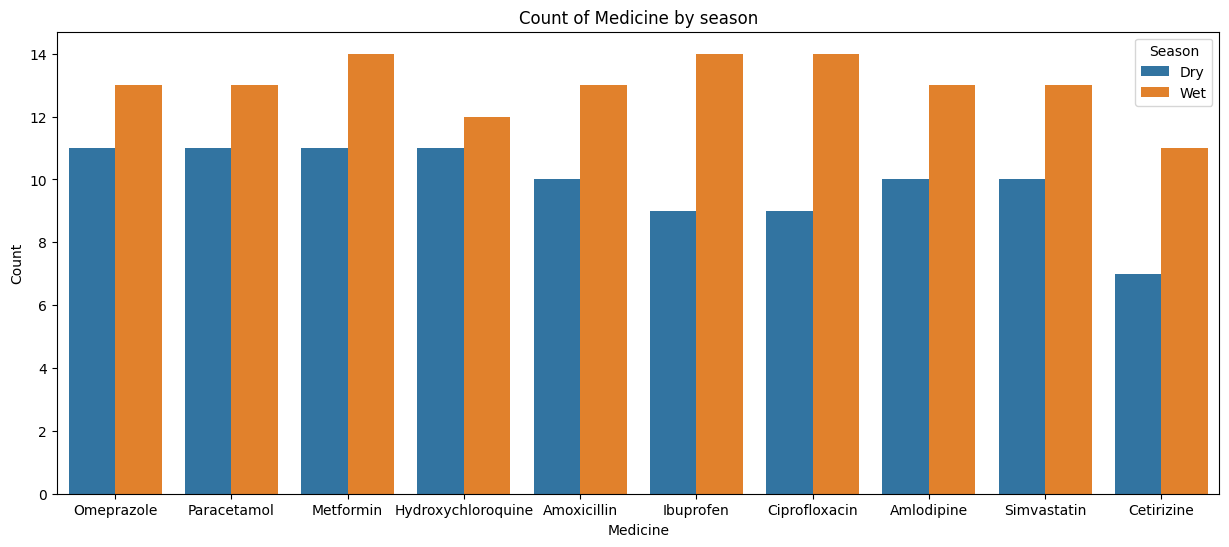

In [6]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Medicine', hue='Season', data=train)
plt.title('Count of Medicine by season')
plt.xlabel('Medicine')
plt.ylabel('Count')
plt.show()

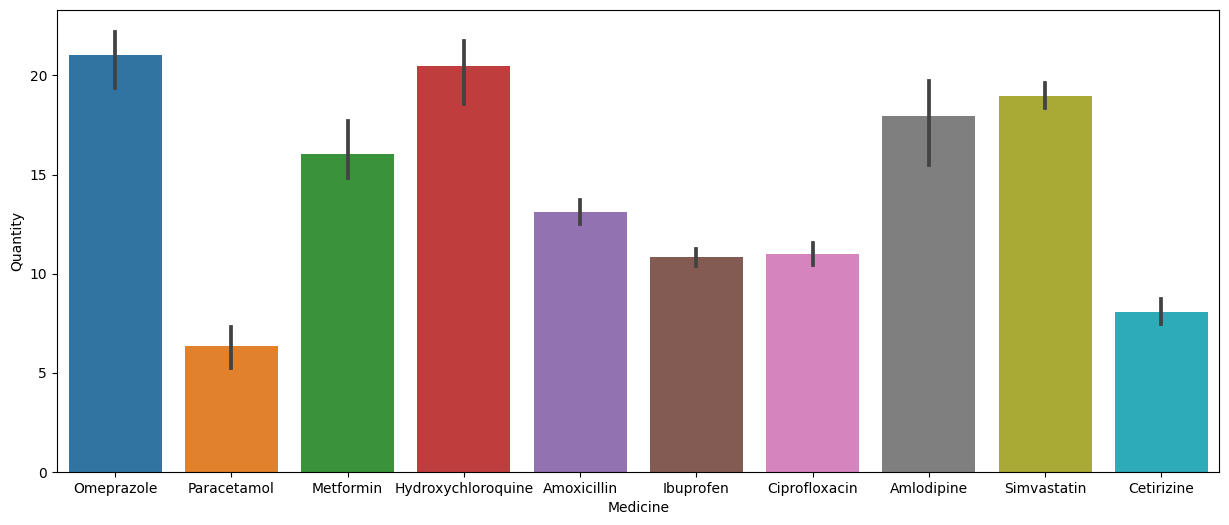

In [7]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Medicine', y='Quantity(Packets)', data=train)

plt.xlabel('Medicine')
plt.ylabel('Quantity')
plt.show()

array([[<Axes: title={'center': 'Quantity(Packets)'}>]], dtype=object)

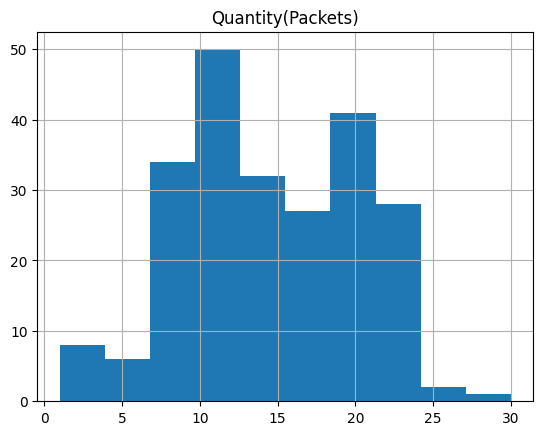

In [8]:
train.hist()

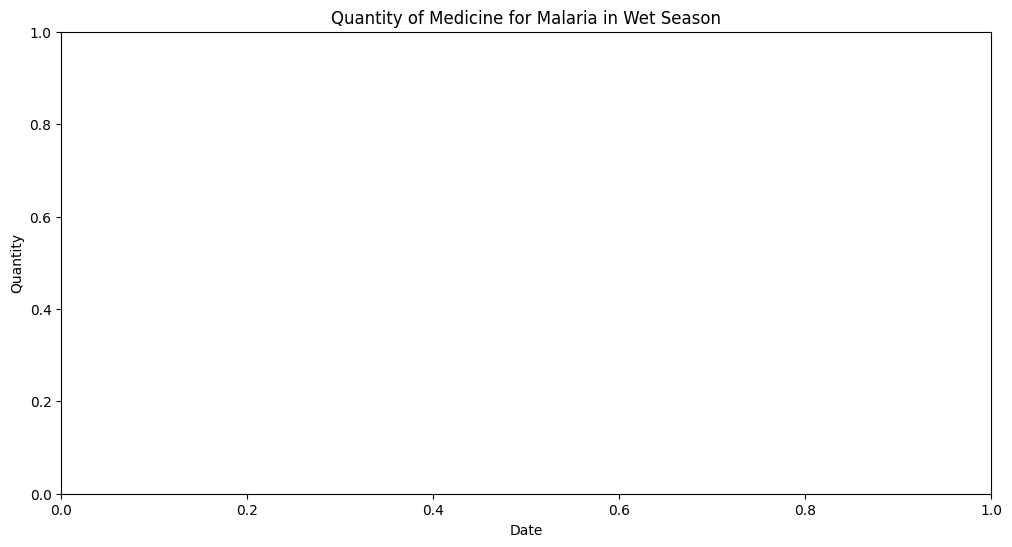

In [9]:
#choose the disease you want
Ds1 = "Artemisinin"

# Filter data for chosen disease and season
disease_data = train[(train["Medicine"] == Ds1) & (train["Season"] == "Wet")]


plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Quantity(Packets)', data=disease_data)

plt.title('Quantity of Medicine for Malaria in Wet Season')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

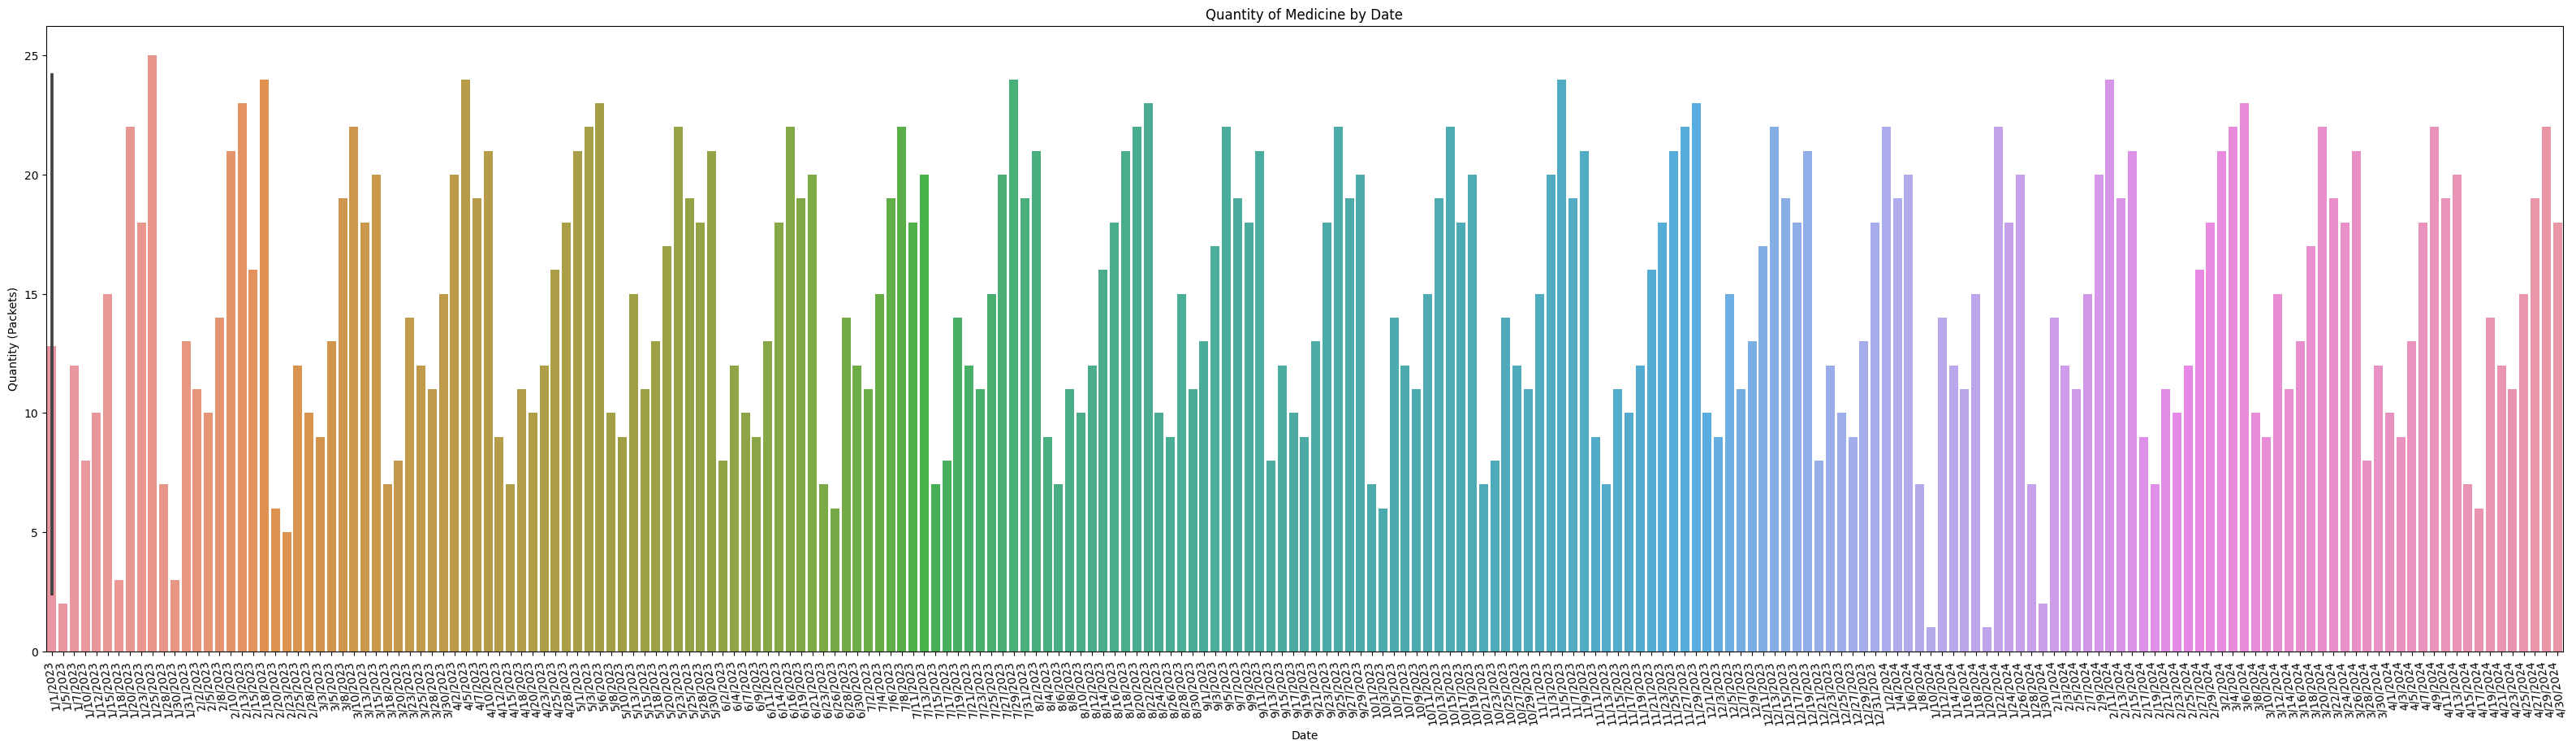

In [10]:
# Plot a bar chart of Quantity by Disease
plt.figure(figsize=(40, 10))
sns.barplot(x='Date', y='Quantity(Packets)', data=train)

plt.xlabel('Date')
plt.ylabel('Quantity (Packets)')
plt.title('Quantity of Medicine by Date')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=100)

plt.show()

In [11]:
# Import necessary libraries
import pandas_profiling

# Generate pandas profiling report for the selected_data dataframe
profile = train.profile_report()

# Print the pandas profiling report
print(profile)

# Generate data for the selected_data dataframe
data = train.sample(5)

# Print the generated data
print(data)

profile.to_notebook_iframe()  # View interactive report


         Patient Name     Medicine    Disease   Variety  Quantity(Packets)  \
110   Susan Namulondo   Omeprazole    Acidity     Ulcer                 19   
96     Michael Mukasa    Ibuprofen       Pain  Migraine                 10   
66   Edward Tumusiime    Ibuprofen       Pain  Headache                 10   
166       Grace Kintu    Metformin   Diabetes    Type 2                 13   
154    Alice Nanyonjo  Amoxicillin  Infection     Viral                 15   

           Date Season  
110    9/7/2023    Dry  
96    8/10/2023    Wet  
66     6/7/2023    Dry  
166  12/29/2023    Wet  
154   12/5/2023    Wet  


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
train_data=train

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient Name       229 non-null    object
 1   Medicine           229 non-null    object
 2   Disease            229 non-null    object
 3   Variety            229 non-null    object
 4   Quantity(Packets)  229 non-null    int64 
 5   Date               229 non-null    object
 6   Season             229 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.7+ KB


In [14]:
train_data["Date"]=pd.to_datetime(train_data["Date"])

train_data['Date']=train_data['Date'].dt.to_period("M")

monthly_sales=train_data.groupby("Date").sum().reset_index()

monthly_sales=monthly_sales['Date'].dt.to_timestamp()

train.head(50)

,Patient Name,Medicine,Disease,Variety,Quantity(Packets),Date,Season
0,Homas Mata,Omeprazole,Pain,future,6,2023-01,Dry
1,Megan Ortega,Paracetamol,Diabetes,painting,1,2023-01,Dry
2,Melissa Pham,Metformin,Pain,value,30,2023-01,Dry
3,Courtney Richardson,Metformin,Diabetes,policy,25,2023-01,Dry
4,Elizabeth Nicholson,Hydroxychloroquine,Malaria,knowledge,2,2023-01,Dry
5,Thomas Kato,Paracetamol,Fever,Influenza,2,2023-01,Dry
6,Sarah Nakato,Amoxicillin,Infection,Bacterial,12,2023-01,Dry
7,Michael Okello,Ibuprofen,Pain,Migraine,8,2023-01,Dry
8,David Mugisha,Ciprofloxacin,Infection,Bacterial,10,2023-01,Dry
9,Elizabeth Namaganda,Metformin,Diabetes,Type 2,15,2023-01,Dry


In [15]:
# Sample Period object
period = pd.Period("2023-11")

# Correct approaches:
year = period.year  # Extract year as an integer
timestamp = period.to_timestamp().timestamp()
period_str = str(period)  # Convert to string

In [16]:
# Print the updated dataframe

train_data["Year"]=train["Date"].dt.year
train_data["Month"]=train["Date"].dt.month


train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   Patient Name       229 non-null    object   
 1   Medicine           229 non-null    object   
 2   Disease            229 non-null    object   
 3   Variety            229 non-null    object   
 4   Quantity(Packets)  229 non-null    int64    
 5   Date               229 non-null    period[M]
 6   Season             229 non-null    object   
 7   Year               229 non-null    int64    
 8   Month              229 non-null    int64    
dtypes: int64(3), object(5), period[M](1)
memory usage: 16.2+ KB


In [17]:
train_data.head

<bound method NDFrame.head of             Patient Name            Medicine       Disease    Variety  \
0             Homas Mata          Omeprazole          Pain     future   
1           Megan Ortega         Paracetamol      Diabetes   painting   
2           Melissa Pham           Metformin          Pain      value   
3    Courtney Richardson           Metformin      Diabetes     policy   
4    Elizabeth Nicholson  Hydroxychloroquine       Malaria  knowledge   
..                   ...                 ...           ...        ...   
224     Brenda Nansubuga       Ciprofloxacin     Infection    Urinary   
225         Fred Nsubuga           Metformin      Diabetes     Type 1   
226        Angela Nakato          Amlodipine  Hypertension  Secondary   
227           Simon Kato          Omeprazole       Acidity       GERD   
228        Viola Nabirye         Simvastatin   Cholesterol       High   

     Quantity(Packets)     Date Season  Year  Month  
0                    6  2023-01    Dry 

In [18]:
train_data=train_data.join(pd.get_dummies(train.Disease)).drop(['Disease'],axis=1)

In [19]:
train_data=train_data.join(pd.get_dummies(train.Season)).drop(['Season'],axis=1)

In [20]:
train_data=train_data.join(pd.get_dummies(train.Medicine)).drop(['Medicine'],axis=1)

In [21]:
train_data


,Patient Name,Variety,Quantity(Packets),Date,Year,Month,Acidity,Allergy,Cholesterol,Diabetes,...,Amlodipine,Amoxicillin,Cetirizine,Ciprofloxacin,Hydroxychloroquine,Ibuprofen,Metformin,Omeprazole,Paracetamol,Simvastatin
0,Homas Mata,future,6,2023-01,2023,1,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,Megan Ortega,painting,1,2023-01,2023,1,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,Melissa Pham,value,30,2023-01,2023,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,Courtney Richardson,policy,25,2023-01,2023,1,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,Elizabeth Nicholson,knowledge,2,2023-01,2023,1,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Brenda Nansubuga,Urinary,11,2024-04,2024,4,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
225,Fred Nsubuga,Type 1,15,2024-04,2024,4,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
226,Angela Nakato,Secondary,19,2024-04,2024,4,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
227,Simon Kato,GERD,22,2024-04,2024,4,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [22]:
profile = train_data.profile_report()

# Print the pandas profiling report
print(profile)

# Generate data for the selected_data dataframe
data = train_data.sample(5)

print(data)

profile.to_notebook_iframe()  # View interactive report



         Patient Name    Variety  Quantity(Packets)     Date  Year  Month  \
216    Robert Semanda    Chronic                 18  2024-04  2024      4   
213  Edward Tumusiime   Headache                 10  2024-04  2024      4   
148  Rebecca Namubiru  Secondary                 18  2023-11  2023     11   
17     Harriet Namuli   Headache                 11  2023-02  2023      2   
25        Paul Lwanga  Influenza                  5  2023-02  2023      2   

     Acidity  Allergy  Cholesterol  Diabetes  ...  Amlodipine  Amoxicillin  \
216    False    False        False     False  ...        True        False   
213    False    False        False     False  ...       False        False   
148    False    False        False     False  ...        True        False   
17     False    False        False     False  ...       False        False   
25     False    False        False     False  ...       False        False   

     Cetirizine  Ciprofloxacin  Hydroxychloroquine  Ibuprofen  Metf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
data.head()

train_data= train_data.drop(['Patient Name','Date','Variety'], axis=1)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Quantity(Packets)   229 non-null    int64
 1   Year                229 non-null    int64
 2   Month               229 non-null    int64
 3   Acidity             229 non-null    bool 
 4   Allergy             229 non-null    bool 
 5   Cholesterol         229 non-null    bool 
 6   Diabetes            229 non-null    bool 
 7   Fever               229 non-null    bool 
 8   Hypertension        229 non-null    bool 
 9   Infection           229 non-null    bool 
 10  Malaria             229 non-null    bool 
 11  Pain                229 non-null    bool 
 12  Dry                 229 non-null    bool 
 13  Wet                 229 non-null    bool 
 14  Amlodipine          229 non-null    bool 
 15  Amoxicillin         229 non-null    bool 
 16  Cetirizine          229 non-null    bool 
 1

In [24]:
train_data.head()

,Quantity(Packets),Year,Month,Acidity,Allergy,Cholesterol,Diabetes,Fever,Hypertension,Infection,...,Amlodipine,Amoxicillin,Cetirizine,Ciprofloxacin,Hydroxychloroquine,Ibuprofen,Metformin,Omeprazole,Paracetamol,Simvastatin
0,6,2023,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,2023,1,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,30,2023,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,25,2023,1,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2,2023,1,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [25]:
X=train_data.drop(['Quantity(Packets)'], axis=1)

In [26]:
y=train_data['Quantity(Packets)']

In [27]:

pd.set_option('display.max_columns', None)
X.describe

<bound method NDFrame.describe of      Year  Month  Acidity  Allergy  Cholesterol  Diabetes  Fever  \
0    2023      1    False    False        False     False  False   
1    2023      1    False    False        False      True  False   
2    2023      1    False    False        False     False  False   
3    2023      1    False    False        False      True  False   
4    2023      1    False    False        False     False  False   
..    ...    ...      ...      ...          ...       ...    ...   
224  2024      4    False    False        False     False  False   
225  2024      4    False    False        False      True  False   
226  2024      4    False    False        False     False  False   
227  2024      4     True    False        False     False  False   
228  2024      4    False    False         True     False  False   

     Hypertension  Infection  Malaria   Pain    Dry    Wet  Amlodipine  \
0           False      False    False   True   True  False       False   
1

In [28]:
y.head()


0     6
1     1
2    30
3    25
4     2
Name: Quantity(Packets), dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X.shape, X_train.shape, X_test.shape)


(229, 23) (183, 23) (46, 23)


In [30]:
# Create and fit the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.973748093882482


In [31]:
'''from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)'''

'from sklearn.ensemble import GradientBoostingRegressor\nmodel = GradientBoostingRegressor()\n\n# Train the model\nmodel.fit(X_train, y_train)\n\n# Make predictions on the testing set\npredictions = model.predict(X_test)\n\n# Evaluate the model\nmse = mean_squared_error(y_test, predictions)\nprint("Mean Squared Error:", mse)'

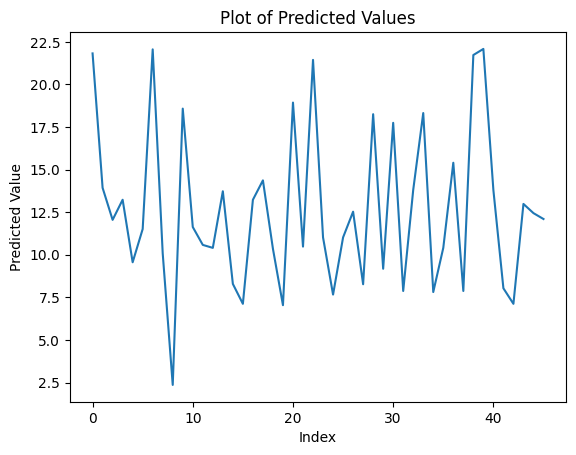

In [32]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Make predictions on the testing set
predictions = model.predict(X_test)


# Plot the predicted values
plt.plot(predictions)
plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.title('Plot of Predicted Values')
plt.show()

In [33]:
import pickle
pickle.dump(model,open("model_saved","wb"))


In [34]:
model_loaded=pickle.load(open('model_saved','rb'))
                        
            

In [35]:
model_loaded.predict(X_test)

array([21.82083333, 13.93      , 12.05      , 13.23      ,  9.56      ,
       11.51      , 22.05866667, 10.07866667,  2.3605    , 18.58      ,
       11.63      , 10.58      , 10.40533333, 13.72816667,  8.29      ,
        7.121     , 13.2285    , 14.36766667, 10.35      ,  7.041     ,
       18.93483333, 10.48      , 21.44      , 11.02      ,  7.66333333,
       11.02      , 12.53      ,  8.27      , 18.25266667,  9.18      ,
       17.74616667,  7.875     , 13.80966667, 18.32      ,  7.81333333,
       10.40533333, 15.40233333,  7.875     , 21.72585714, 22.08419048,
       13.8       ,  8.03333333,  7.121     , 12.985     , 12.445     ,
       12.1       ])